# _Flower Classification from Iris Dataset_

### _Importing Necessary Libraries_

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### _Reading Data from IRIS.csv file_

In [68]:
data = pd.read_csv(".\Dataset\IRIS.csv")
print(data.sample(6))
print("\nShape: ", data.shape)

     sepal_length  sepal_width  petal_length  petal_width          species
66            5.6          3.0           4.5          1.5  Iris-versicolor
105           7.6          3.0           6.6          2.1   Iris-virginica
23            5.1          3.3           1.7          0.5      Iris-setosa
30            4.8          3.1           1.6          0.2      Iris-setosa
103           6.3          2.9           5.6          1.8   Iris-virginica
106           4.9          2.5           4.5          1.7   Iris-virginica

Shape:  (150, 5)


In [14]:
data['species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

In [19]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.322522
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,0.192719
petal_length,0.871754,-0.420516,1.000000,0.962757,0.299942
petal_width,0.817954,-0.356544,0.962757,1.000000,0.375715
species,0.322522,0.192719,0.299942,0.375715,1.000000


### _Visualizing the corr matrix_

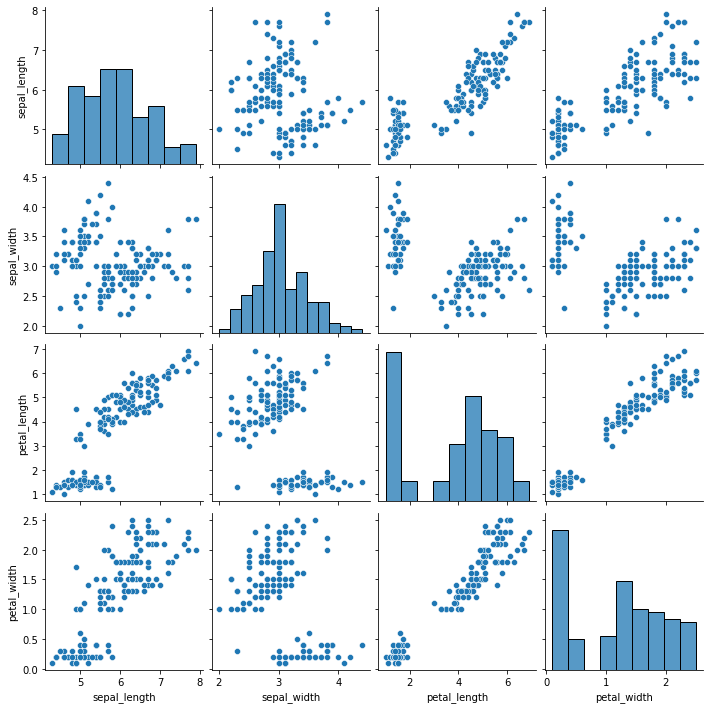

In [17]:
sns.pairplot (data)

### _Feature Engineering_

In [18]:
data['species'] = data['species'].map({'Iris-versicolor': 0, 'Iris-setosa': 1, 'Iris-virginica': 2})
data['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [20]:
X = data.drop(columns="species")
y = data["species"]

### _Importing Models from sklearn library for training_

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [49]:
clf = []
clf.append(('NB ', GaussianNB()))
clf.append(('LogReg ', LogisticRegression(random_state=9)))
clf.append(('DT ', DecisionTreeClassifier(random_state = 9)))
clf.append(('KNN ', KNeighborsClassifier()))
clf.append(('SVC', SVC(random_state = 9)))
clf.append(('RFC', RandomForestClassifier(n_estimators=100, random_state=9)))
clf.append(('LDA', LinearDiscriminantAnalysis()))

### _Train and Test_

In [30]:
res = []
for i, j in clf:
  j.fit(X_train, y_train)
  y_pred = j.predict(X_test)
  print(y_pred, ' Accuracy for ',i, ' = ', j.score(X_test, y_test))
  res.append(j.score(X_test, y_test))

[2 0 1 2 1 2 1 0 0 0 2 0 0 0 0 1 0 0 1 1 2 0 1 1 2 1 1 0 0 1 2 0 1 2 2 0 1
 0 0 0 2 1 2 1 1]  Accuracy for  NB   =  1.0
[2 0 1 2 1 2 1 0 0 0 2 0 0 0 0 1 0 0 1 1 2 0 1 1 2 1 1 0 0 1 2 0 1 2 2 0 1
 2 0 0 2 1 2 1 1]  Accuracy for  LogReg   =  0.9777777777777777
[2 0 1 2 1 2 1 0 0 0 2 0 0 0 0 1 0 0 1 1 2 0 1 1 2 1 1 0 0 1 2 0 1 2 2 0 1
 2 0 0 2 1 2 1 1]  Accuracy for  DT   =  0.9777777777777777
[2 0 1 2 1 2 1 0 0 0 2 0 0 0 0 1 0 0 1 1 2 0 1 1 2 1 1 0 0 1 2 0 1 2 2 0 1
 2 0 0 2 1 2 1 1]  Accuracy for  KNN   =  0.9777777777777777
[2 0 1 2 1 2 1 0 0 0 2 0 0 0 0 1 0 0 1 1 2 0 1 1 2 1 1 0 0 1 2 0 1 2 2 0 1
 2 0 0 2 1 2 1 1]  Accuracy for  SVC  =  0.9777777777777777
[2 0 1 2 1 2 1 0 0 0 2 0 0 0 0 1 0 0 1 1 2 0 1 1 2 1 1 0 0 1 2 0 1 2 2 0 1
 2 0 0 2 1 2 1 1]  Accuracy for  RFC  =  0.9777777777777777
[2 0 1 2 1 2 1 0 0 0 2 0 0 0 0 1 0 0 1 1 2 0 1 1 2 1 1 0 0 1 2 0 1 2 2 0 1
 2 0 0 2 1 2 1 1]  Accuracy for  LDA  =  0.9777777777777777


In [64]:
### _Plotting CrossValidation Score Obtained for Each Model_

<BarContainer object of 7 artists>

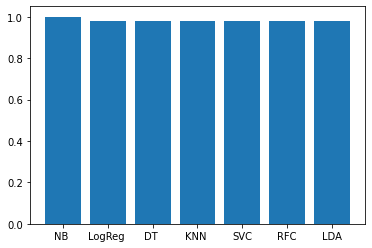

In [66]:
c1, c2 = zip(*clf)
plt.bar(c1, res, label = "Accuracy from Cross Validation Score")

### _Future Improvements_<br>
- Use different means of accuracy calculation like the GridSearch, Confusion Matrix, Gini Index, etc.
- Use more versatile feature selection techniques based on correlation values for dominant results.

### Current results
- Looking at the ideal situation the data set provides, a low bias model like Gaussian Naive Bayes was able to prdict every species perfectly.